In [1]:
#Importing libraries for reading dataset and basic operations.
import pandas as pd
import numpy as np


#Importing libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Reading the dataset
data1=pd.read_csv('E:\\DataSets\\Mall_Customers.csv')
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data1.shape

#It has 200 rows and 5 columns

(200, 5)

In [4]:
data1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#Checking null values

data1.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

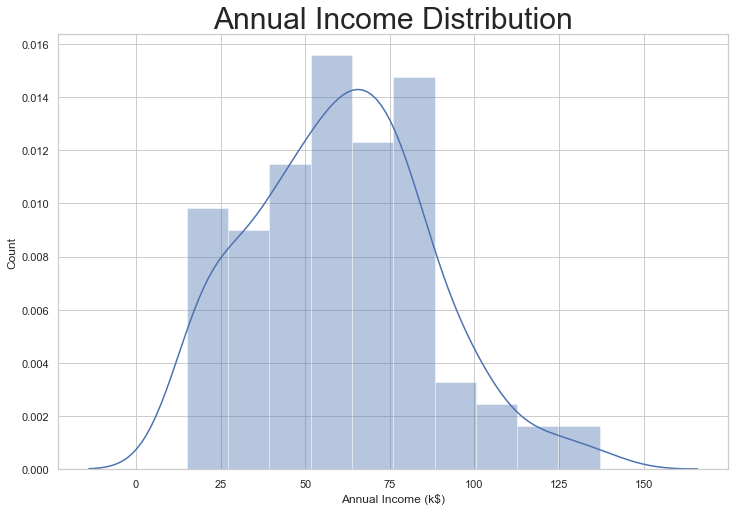

In [17]:
#Let's see how "Annual Income" is distributed

plt.rcParams['figure.figsize']=(12,8)
sns.set(style='whitegrid')
sns.distplot(data1['Annual Income (k$)'])
plt.title('Annual Income Distribution',fontsize=30)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

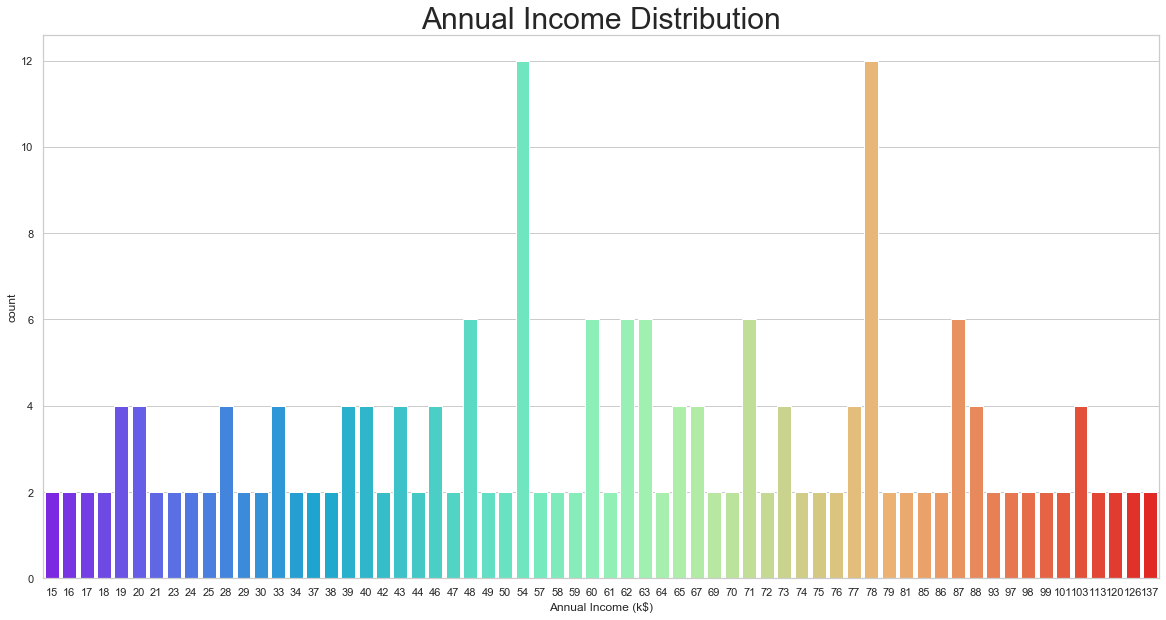

In [23]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data1['Annual Income (k$)'],palette='rainbow')
plt.title('Annual Income Distribution',fontsize=30)
plt.show()

### We can see that more number of customers are having annual income of 54k and 78k dollars

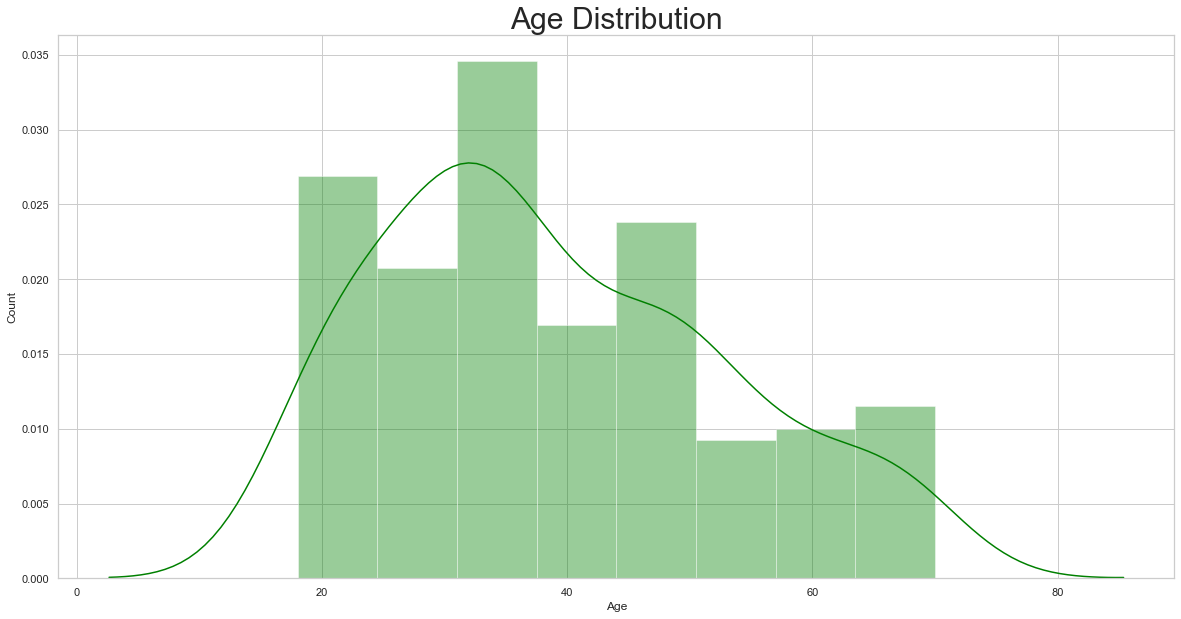

In [29]:
#Let's see how data of "Age" is distributed

sns.set(style='whitegrid')
sns.distplot(data1['Age'],color='green')
plt.title('Age Distribution',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

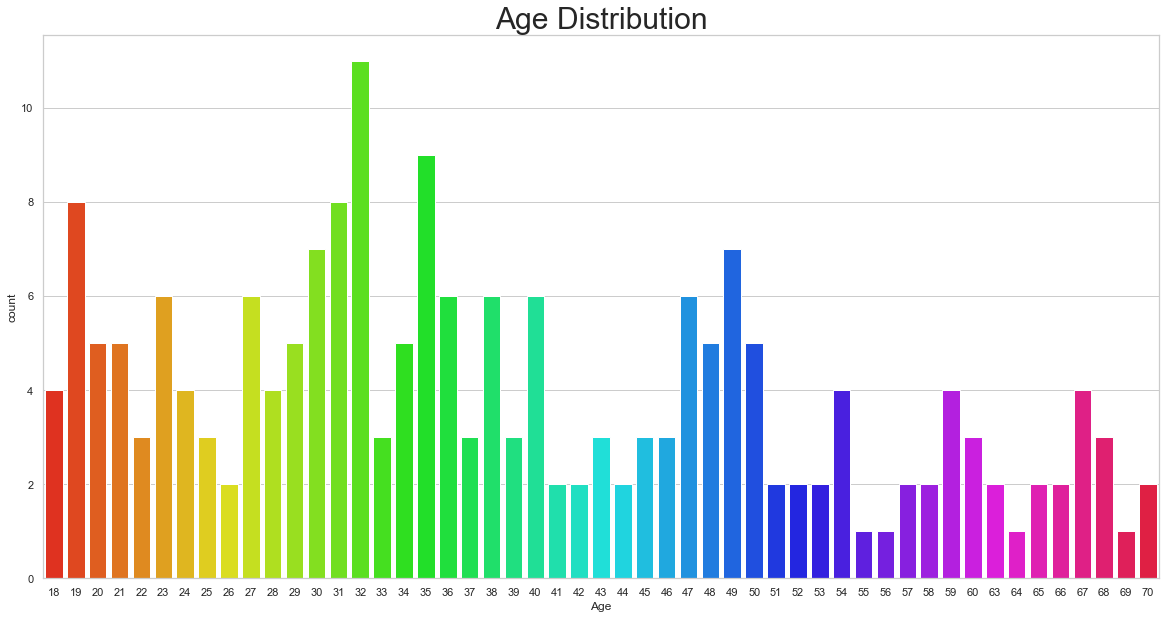

In [34]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data1['Age'],palette='hsv')
plt.title('Age Distribution',fontsize=30)
plt.show()


## We can infer that
### 1. Age group of 32 are most frequent visitors.
### 2. Age groups of 27-40 are also more frequent visitors. 
### 3. Age group greater than 50 are comparitively less frequent visitors.
### 4. Age group around 19 are also more frequent visitors.

In [35]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
data1['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

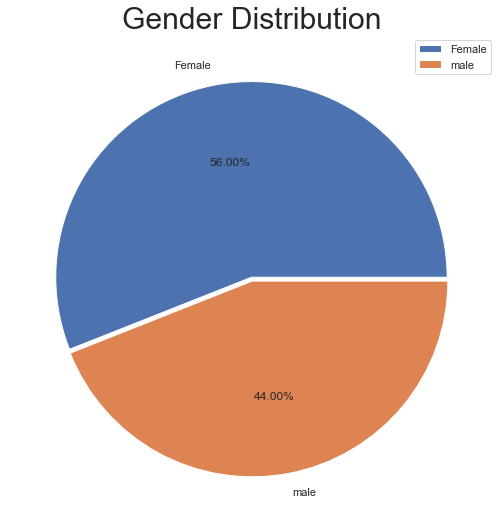

In [52]:
#Let's see some visualization of Gender

sex=['Female','male']
req=data1['Gender'].value_counts()


plt.rcParams['figure.figsize']=(9,9)
plt.pie(req,labels=sex,explode=[0.01,0.01],autopct='%.2f%%')
plt.title('Gender Distribution',fontsize=30)
plt.axis('off')
plt.legend()
plt.show()

### We can infer that females are more Frequent visitors than Males.

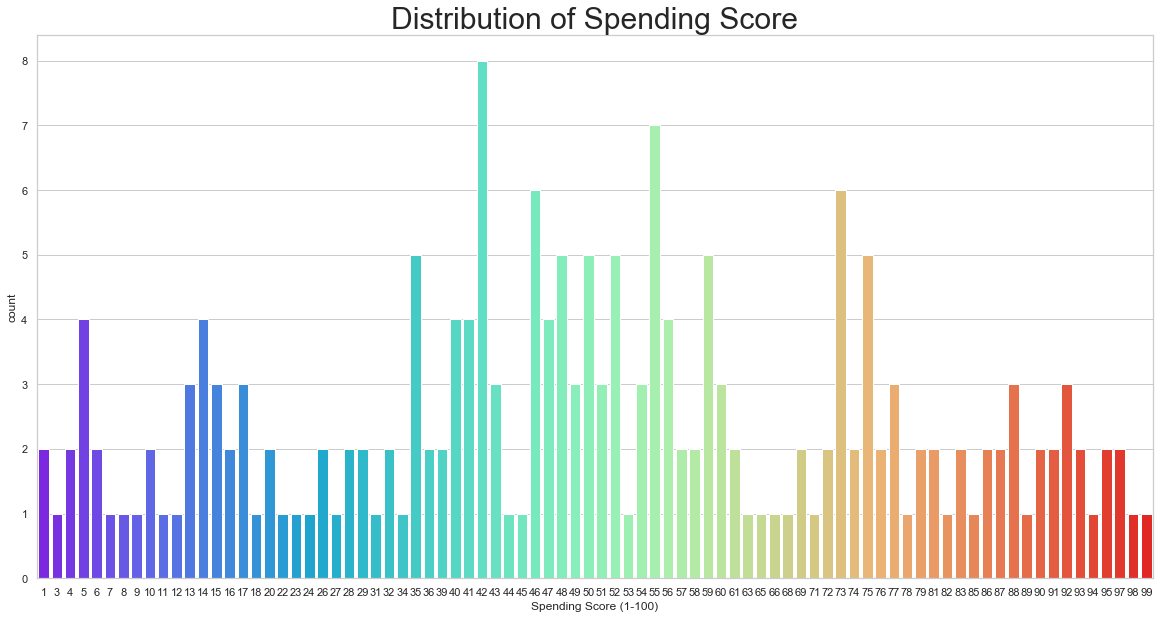

In [55]:
# Let's see some visualizations on Spending score

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data1['Spending Score (1-100)'],palette='rainbow')
plt.title('Distribution of Spending Score',fontsize=30)
plt.show()

### We can infer that most customers have spending score ranging from 35 to 59.

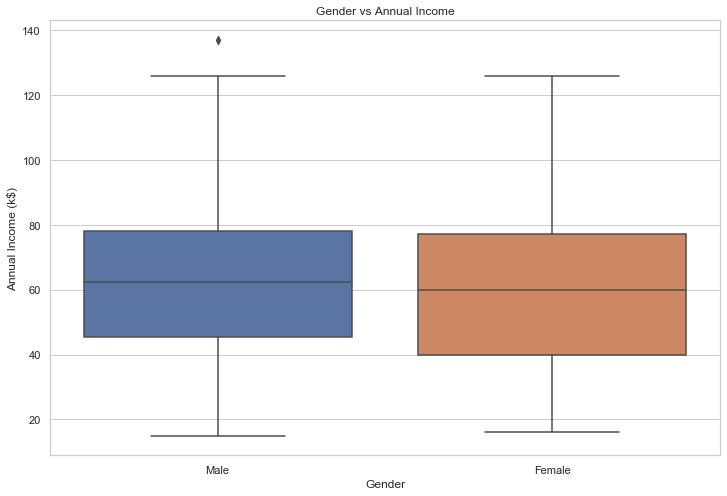

In [79]:
#Let's see the annual income distribution based on Gender

sns.boxplot(data1['Gender'],data1['Annual Income (k$)'])
plt.title('Gender vs Annual Income')
plt.show()



### Here, we can infer that the annual income of Males is quite higher than that of Females

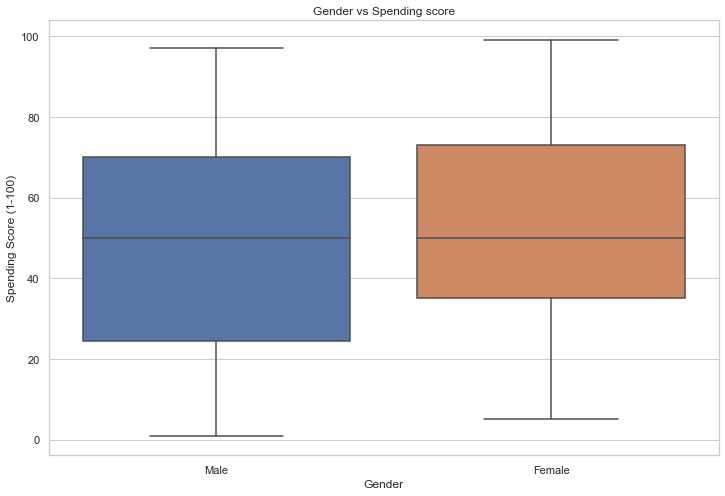

In [80]:
#Let's see the Spending score characteristics based on Gender

sns.boxplot(data1['Gender'],data1['Spending Score (1-100)'])
plt.title('Gender vs Spending score')
plt.show()


### Here, we can see that the spending score of Females is quite higher than that of Males

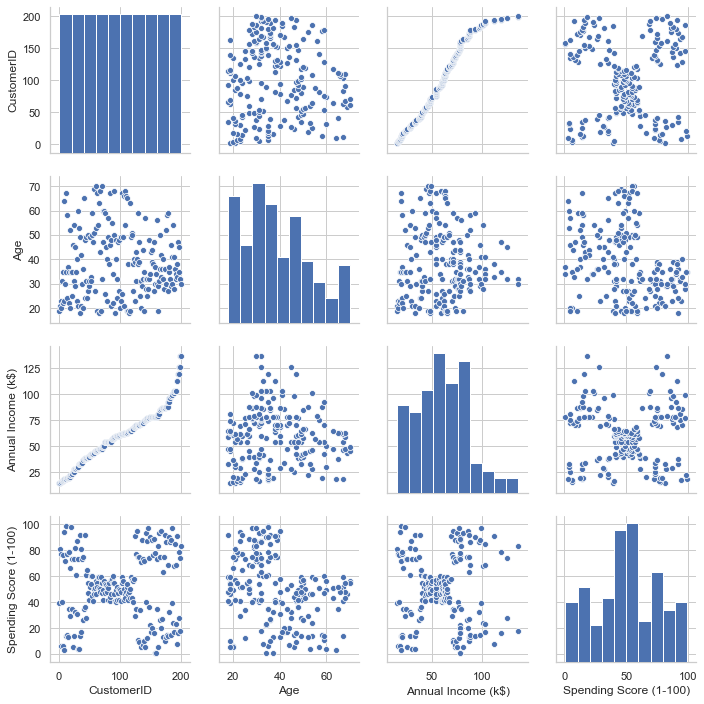

In [59]:
#Let's see the overall metrics using Pair plot

sns.pairplot(data1)
plt.show()

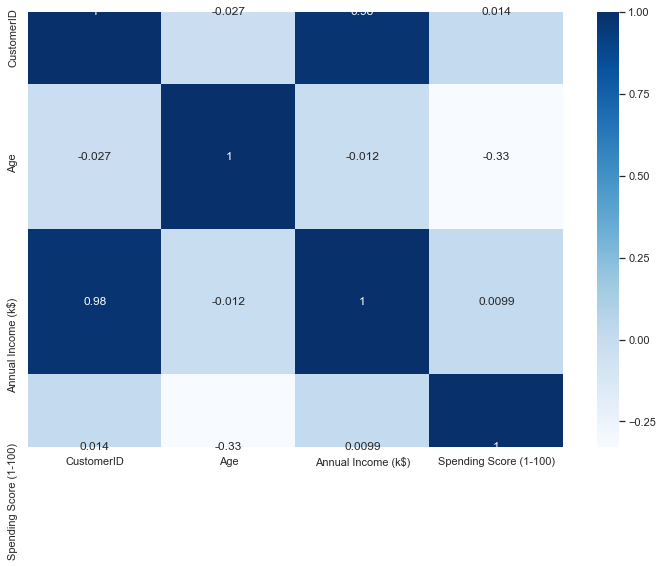

In [73]:
#Let's see the correlation among the features in the data 

plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(data1.corr(),cmap='Blues',annot=True)
plt.show()

In [ ]:
## There is no good correlation among them. Hence we can use all of them.



In [82]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
#Let's use Annual income and Spending Score for our clustering

inputs=data1.iloc[:,[3,4]].values
inputs.shape

(200, 2)

### We have many clustering algorithms such as :

#### 1. K-Means clustering
#### 2. Mean-Shift Clustering
#### 3. DBSCAN clustering
#### 4. EM clustering
#### 5. Agglomerative Hierarchical clustering

### But, in this notebook, let us see how we can use "K-Means Clustering" and "Agglomerative Hierarchical clustering" can be used.

## ----------------------------------------------------------------------------------------------------------------------

# K-Means Clustering

# ------------------------------------------------------------------------------------------------

#### FYi, To fing optimal number of clusters, there are many methods such as 
##### 1. Selecting k using Domain knowledge
##### 2. ELBOW method
##### 3. Thumb rule
##### 4. silhouette method

#### Here, let's see how we can find k using ELBOW method

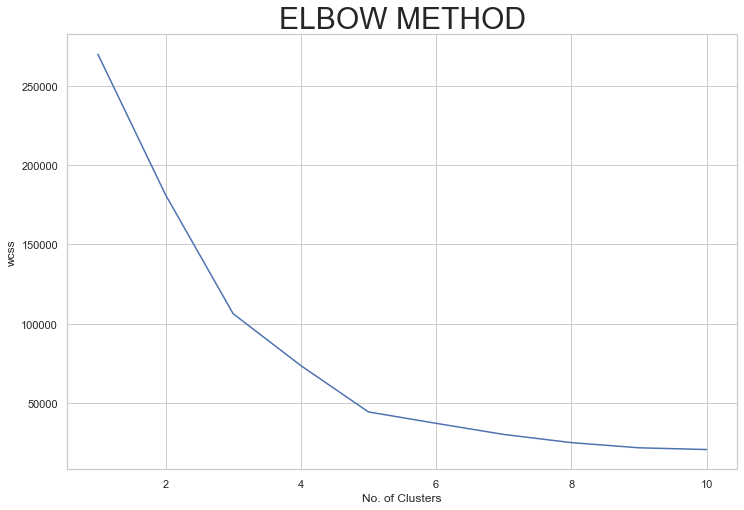

In [91]:
from sklearn.cluster import KMeans

wcss=[] #Within cluster sum of squares

for i in range(1,11):  #This can be any number. But, 10 is sufficient.
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0) 
    km.fit(inputs)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD',fontsize=30)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

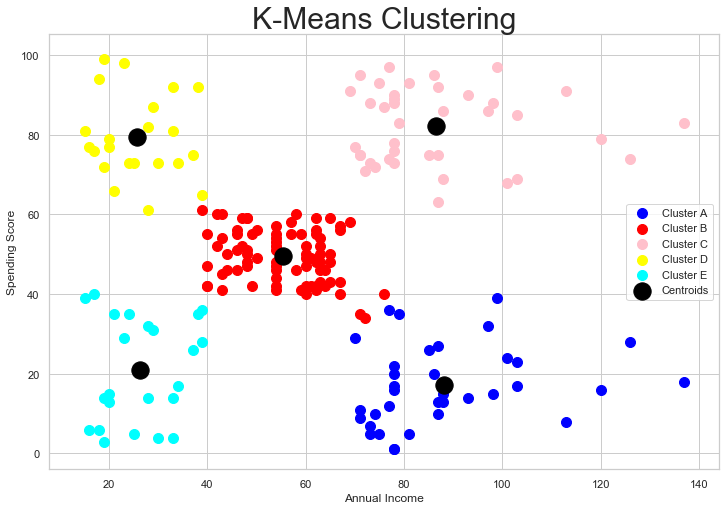

In [95]:
## From the above graph, we can see that 5 is the optimal value for K. Let's select K as 5.

km=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y=km.fit_predict(inputs)

plt.scatter(inputs[y==0,0],inputs[y==0,1],color='blue',label='Cluster A',s=100)
plt.scatter(inputs[y==1,0],inputs[y==1,1],color='red',label='Cluster B',s=100)
plt.scatter(inputs[y==2,0],inputs[y==2,1],color='pink',label='Cluster C',s=100)
plt.scatter(inputs[y==3,0],inputs[y==3,1],color='yellow',label='Cluster D',s=100)
plt.scatter(inputs[y==4,0],inputs[y==4,1],color='cyan',label='Cluster E',s=100)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,label='Centroids',color='black')

plt.title('K-Means Clustering',fontsize=30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### We can infer that

#### Cluster A (Blue) -> earning high but spending less
#### cluster B (Red) -> average in terms of earning and spending 
#### cluster C (pink) -> earning high and also spending high
#### cluster D (Yellow) -> earning less but spending more
#### Cluster E (cyan) -> Earning less , spending less



### 1. Focus can be done on Cluster C to attract more
### 2. Special care should be taken on cluster E

# =========================================

# HIERARCHICAL CLUSTERING
# ========================================

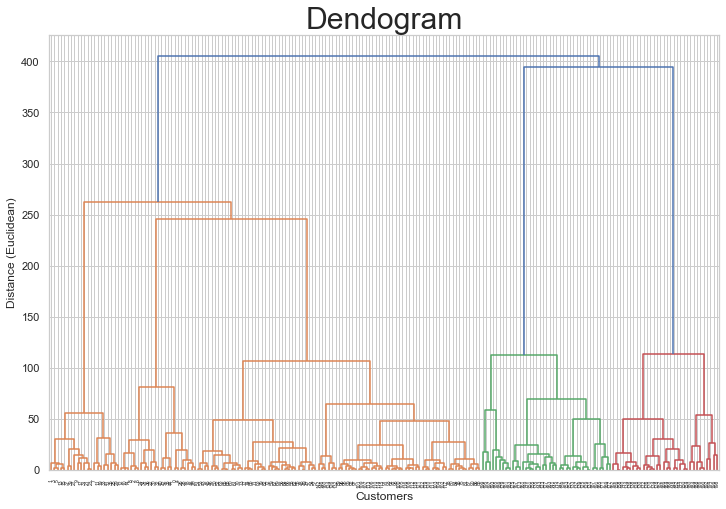

In [104]:
# Here we can find the optimal number of clusters using dendogram.

import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(inputs,method='ward'))
plt.title('Dendogram',fontsize=30)
plt.xlabel('Customers')
plt.ylabel('Distance (Euclidean)')
plt.show()

#### Here, draw two horizontal lines at the highest vertical lines which do not intersect with other clusters.
#### Then the number of vertical lines between those two horizontal lines will be the optimal number of clusters.

#### From our dendogram, we can draw one horizontal line at distance around 110 and the other will be at around 245.
#### Then the number of vertical lines between those two horizontal lines will be 5. Hence we can consider K as 5.

In [101]:
# Let's fit it.

from sklearn.cluster import AgglomerativeClustering

ahc=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
y_ahc=ahc.fit_predict(inputs)

#### There are many distance metrics such as Euclidean distance and Manhattan distance.

#### For example, if x=(a,b) and y=(c,d), then the Euclidean distance between x and y is √(a−c)²+(b−d)²
#### and the Manhattan distance between x and y will be |a−c|+|b−d|

# --------------------------------------------------------------------------------------

#### Linkage criteria also has many types such as Single linkage , Complete linkage, Average linkage, Ward linkage.

#### In Ward linkage, the distance between clusters is the sum of squared differences within all clusters

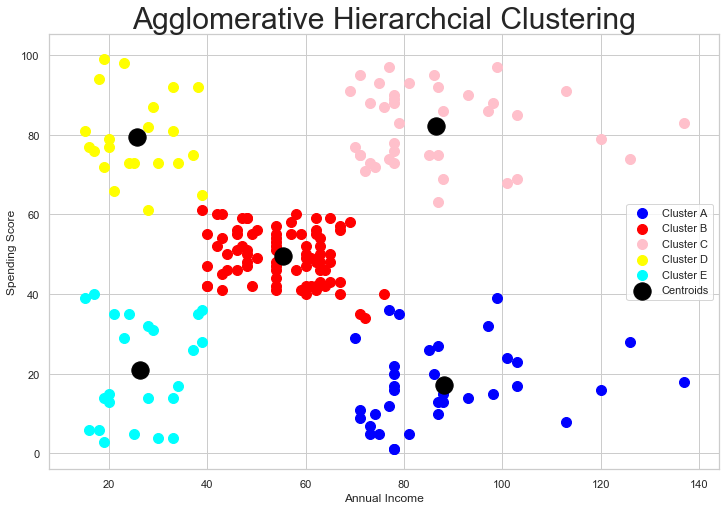

In [105]:
# Let's visualize it.

plt.scatter(inputs[y==0,0],inputs[y==0,1],color='blue',label='Cluster A',s=100)
plt.scatter(inputs[y==1,0],inputs[y==1,1],color='red',label='Cluster B',s=100)
plt.scatter(inputs[y==2,0],inputs[y==2,1],color='pink',label='Cluster C',s=100)
plt.scatter(inputs[y==3,0],inputs[y==3,1],color='yellow',label='Cluster D',s=100)
plt.scatter(inputs[y==4,0],inputs[y==4,1],color='cyan',label='Cluster E',s=100)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,label='Centroids',color='black')

plt.title('Agglomerative Hierarchcial Clustering',fontsize=30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()